In [1]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import mplhep
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
import seaborn as sns
from scipy.optimize import curve_fit
from utils.components import unique_name_ext_re

mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [15]:
file = uproot.open(
    "/work/cetin/LHCb/reco_tuner/data/tracking_losses_ntuple_B_upstream.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
    # "/work/cetin/LHCb/reco_tuner/data/tracking_losses_ntuple_B_def.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
electrons = allcolumns[(allcolumns.isElectron) & (allcolumns.fromB)]

ak.num(electrons, axis=0)
# ak.count(found, axis=None)

38525

In [16]:
# electrons.type.show()

In [17]:
cut_prop: bool = electrons.p_end_velo > 0  # 3e3
found = electrons[~electrons.lost]
lost = electrons[electrons.lost]

eloss_found = (found["p"] - found["p_upstream"]) / found["p"]
eloss_lost = (lost["p"] - lost["p_upstream"]) / lost["p"]

eloss = (electrons["p"] - electrons["p_upstream"]) / electrons["p"]

In [18]:
eloss_velo_found = (found["p"] - found["p_end_velo"]) / found["p"]
eloss_velo_lost = (lost["p"] - lost["p_end_velo"]) / lost["p"]

eloss_velo = (electrons["p"] - electrons["p_end_velo"]) / electrons["p"]

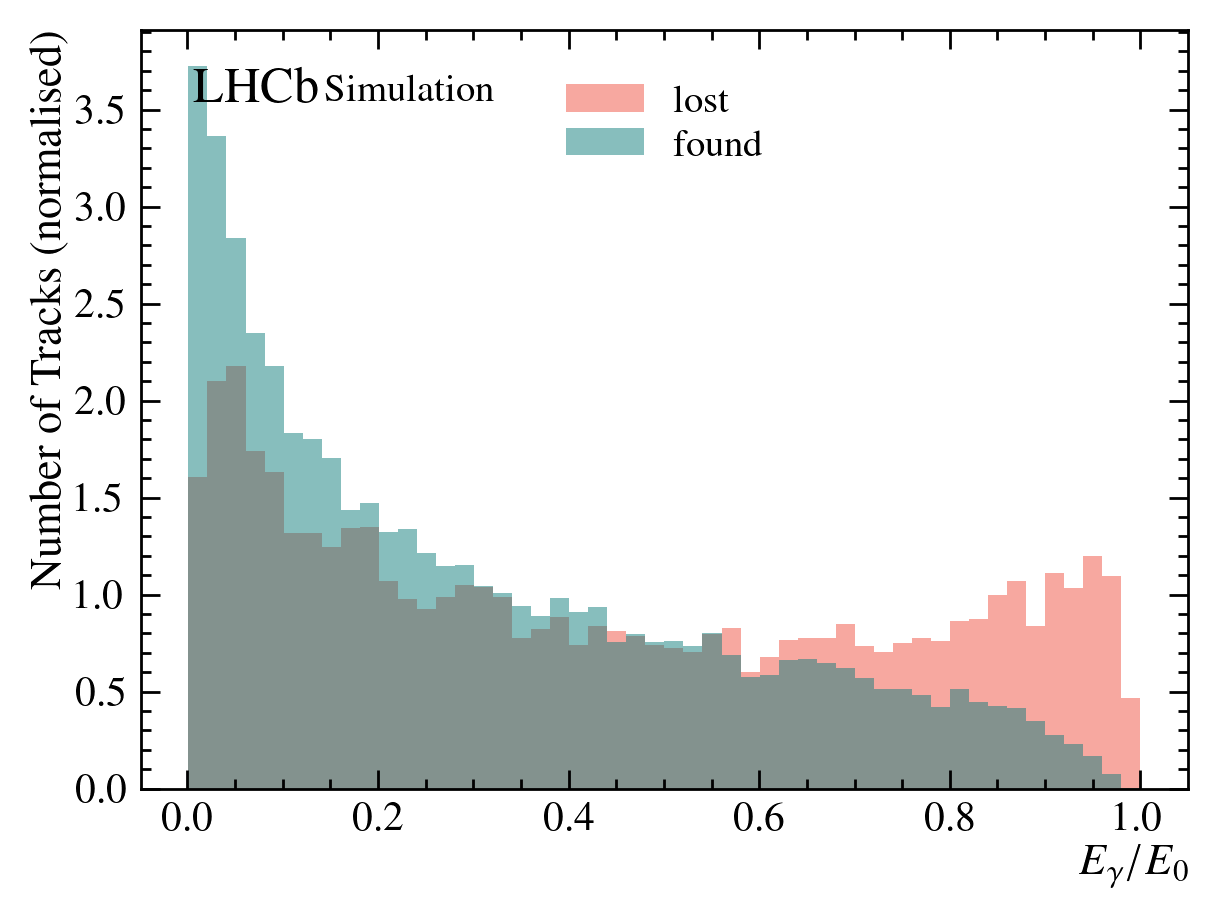

In [19]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
plt.legend(loc="upper center")
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_beginVelo2endT.pdf",
#     format="PDF",
# )

In [20]:
sorted_eloss_found = ak.to_numpy(ak.sort(eloss_found))
sorted_eloss_lost = ak.to_numpy(ak.sort(eloss_lost))
sorted_eloss = ak.to_numpy(ak.sort(eloss))
sorted_eloss_velo = ak.to_numpy(ak.sort(eloss_velo))

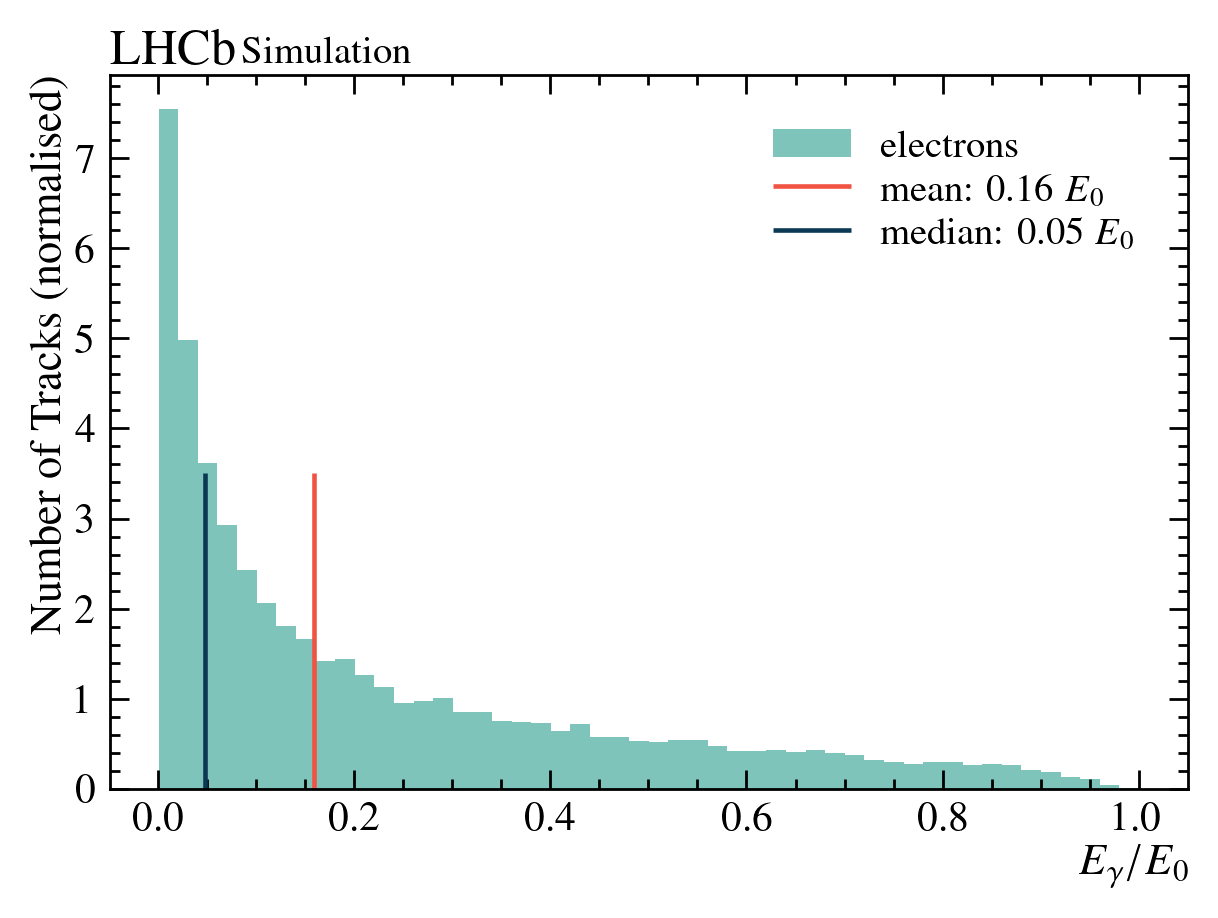

In [21]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_velo),
    bins=nbins,
    density=True,
    alpha=0.6,
    histtype="bar",
    color="#2A9D8F",
    label="electrons",
    range=[0.001, 1],
)
mean_eloss = np.mean(ak.to_numpy(eloss_velo))
plt.vlines(
    mean_eloss,
    ymin=0,
    ymax=3.5,
    colors="#F05342",
    label=f"mean: {np.round(mean_eloss,2)} $E_0$",
)
median_eloss = np.median(sorted_eloss_velo)
plt.vlines(
    median_eloss,
    ymin=0,
    ymax=3.5,
    colors="#0B3954",
    label=f"median: {np.round(median_eloss,2)} $E_0$",
)

plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.legend()  # loc="upper center")
# plt.show()
plt.savefig(
    "/work/cetin/Projektpraktikum/thesis/emitted_energy_velo_mean.pdf",
    format="PDF",
)

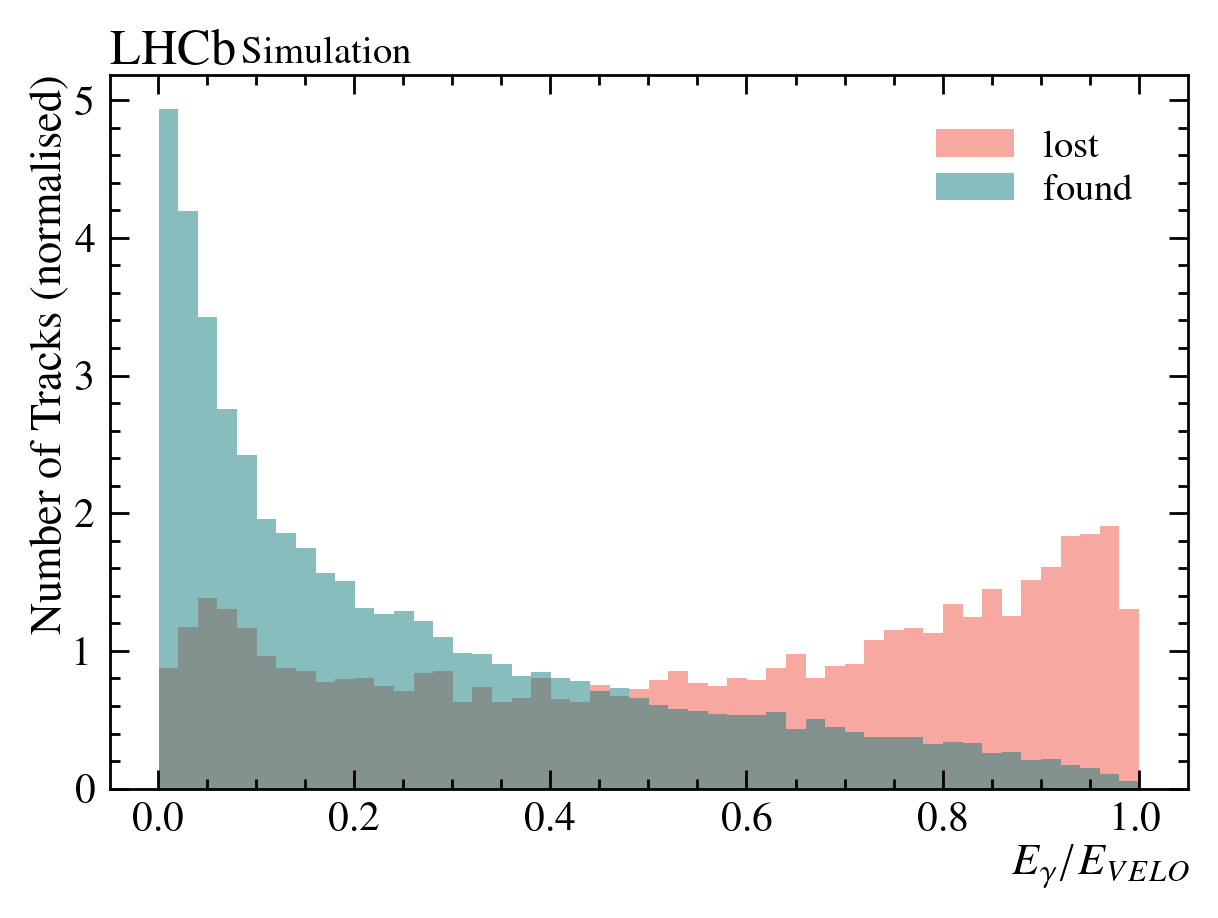

In [7]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_magnet_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_magnet_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_{VELO}$")
plt.ylabel("Number of Tracks (normalised)")
# plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_endVelo2endT.pdf",
#     format="PDF")

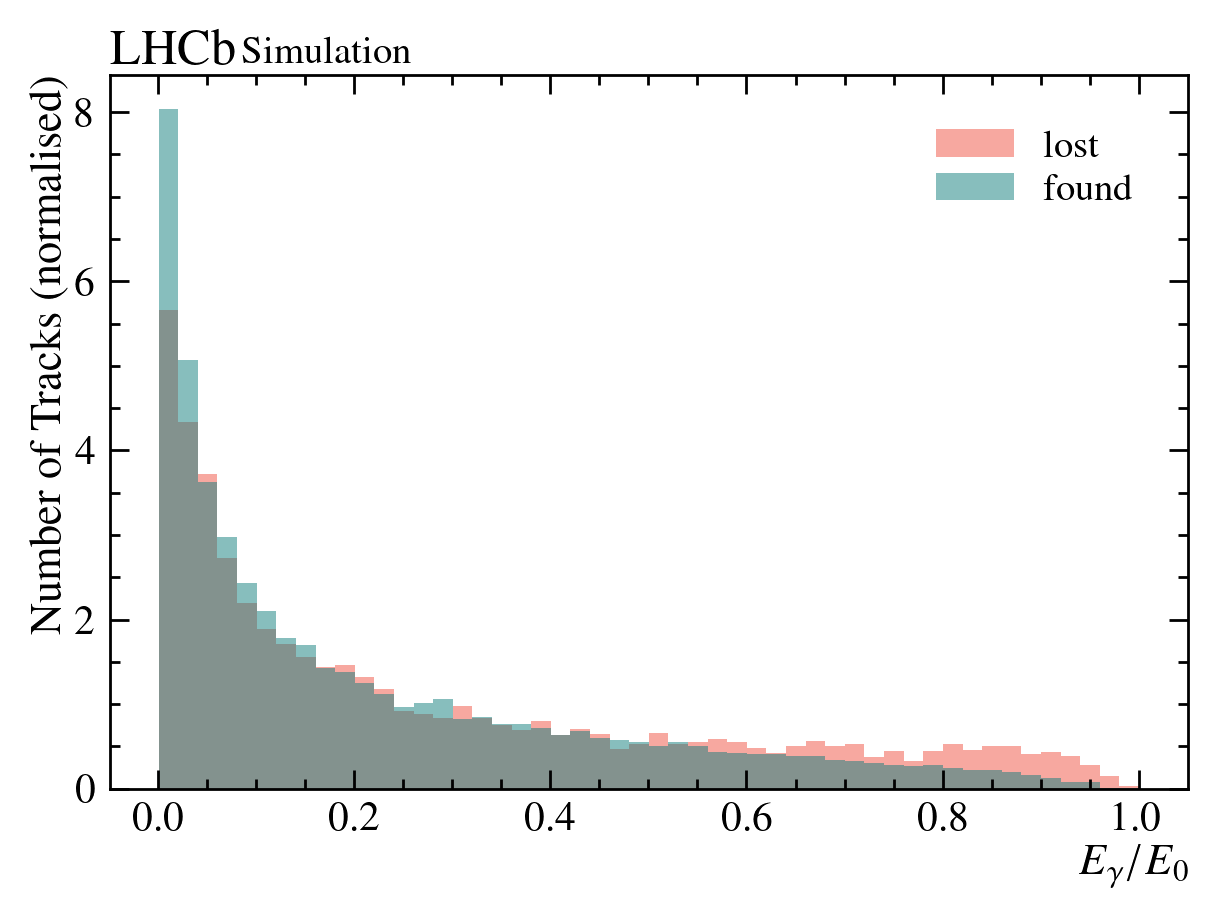

In [8]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_velo_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_velo_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_0$")
# plt.ylabel("a.u.")
plt.ylabel("Number of Tracks (normalised)")

# plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_beginVelo2endVelo.pdf",
#     format="PDF",
# )

In [9]:
### --- ### above should be correct

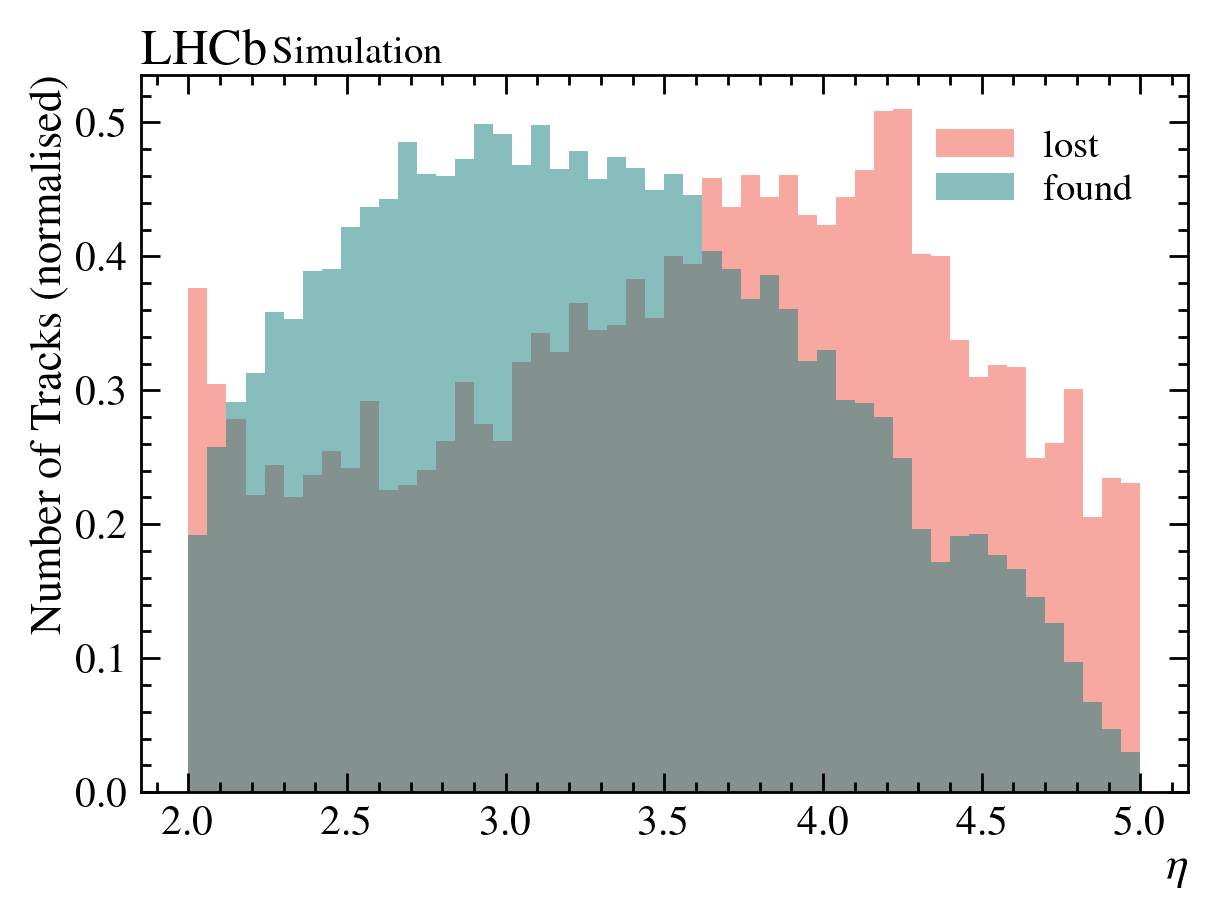

In [12]:
nbins = 50
plt.hist(
    ak.to_numpy(lost["eta"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[2, 5],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(found["eta"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[2, 5],
)
# plt.xlim(2, 5)
plt.xlabel(r"$\eta$")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
# plt.show()
plt.savefig(
    "/work/cetin/Projektpraktikum/thesis/eta_found_lost.pdf",
    format="PDF",
)

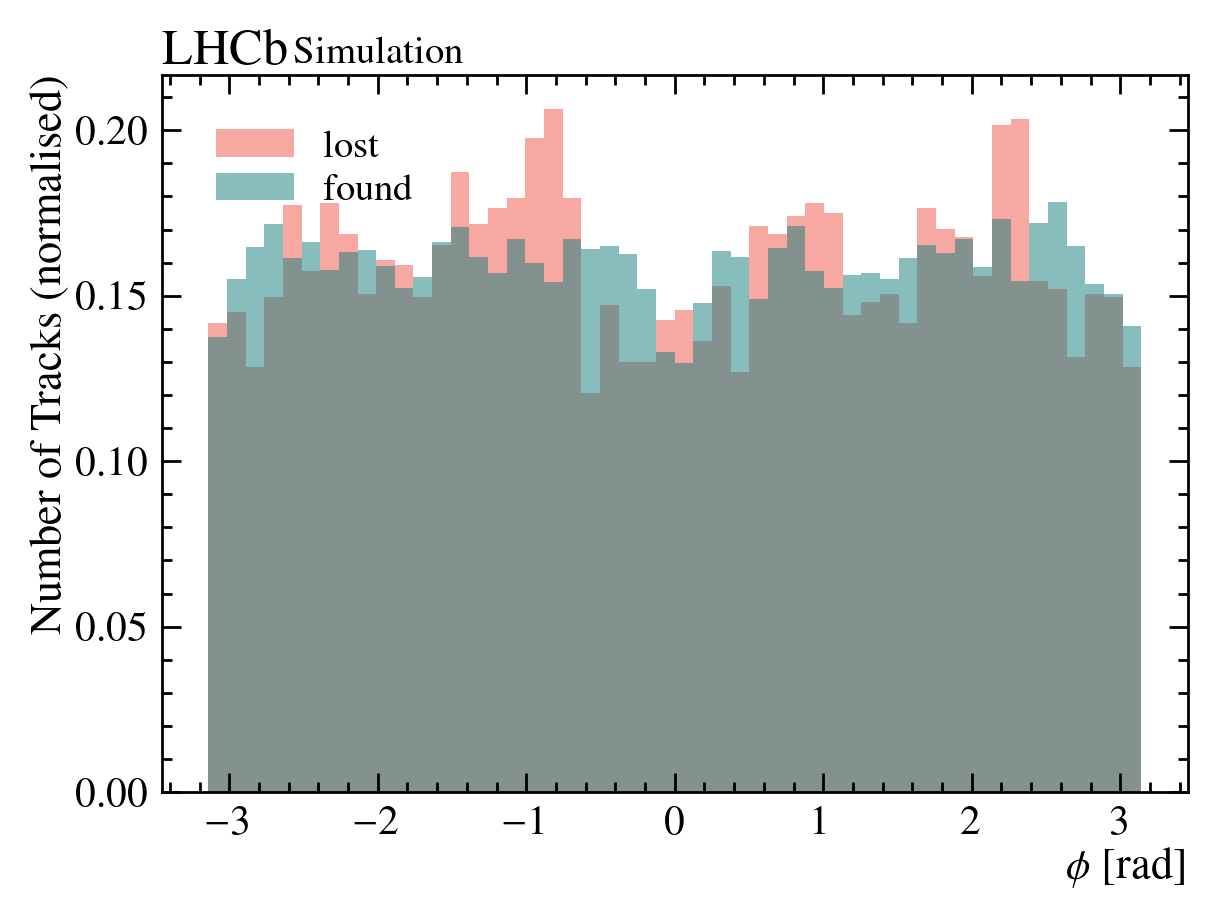

In [11]:
nbins = 50
plt.hist(
    ak.to_numpy(lost["phi"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[-3.142, 3.142],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(found["phi"]),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[-3.142, 3.142],
)
# plt.xlim(2, 5)
plt.xlabel(r"$\phi$ [rad]")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/phi_found_lost.pdf",
#     format="PDF",
# )

In [11]:
# magnet kick position
input_tree = uproot.open({
    "/work/cetin/LHCb/reco_tuner/data/tracking_losses_ntuple_B_upstream.root":
    "PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
})
array = input_tree.arrays()

array["dSlope_yEndT"] = array["ideal_state_9410_ty"] - array[
    "ideal_state_770_ty"]
array["dSlope_yEndT_abs"] = abs(array["dSlope_yEndT"])

array["dSlope_xEndT"] = array["ideal_state_9410_tx"] - array[
    "ideal_state_770_tx"]
array["dSlope_xEndT_abs"] = abs(array["dSlope_xEndT"])
array["x_EndT_abs"] = abs(array["ideal_state_9410_x"])
array["x_EndVelo_abs"] = abs(array["ideal_state_770_x"])

array["y_EndT_abs"] = abs(array["ideal_state_9410_y"])
array["y_EndVelo_abs"] = abs(array["ideal_state_770_y"])

array["z_mag_xEndT"] = (
    array["ideal_state_770_x"] - array["ideal_state_9410_x"] -
    array["ideal_state_770_tx"] * array["ideal_state_770_z"] +
    array["ideal_state_9410_tx"] *
    array["ideal_state_9410_z"]) / array["dSlope_xEndT"]

# array["yStraightOut"] = array[
#     "ideal_state_770_y"] + array["ideal_state_770_ty"] * (
#         array["ideal_state_10000_z"] - array["ideal_state_770_z"])
# array["yDiffOut"] = array["ideal_state_10000_y"] - array["yStraightOut"]

not_e = array[(array.isProton)]

array = array[(array.isElectron) & (array.fromB)]
stretch_factor = ak.num(array[array.lost], axis=0) / ak.num(array[~array.lost],
                                                            axis=0)
# stretch_factor

In [9]:
# not_e

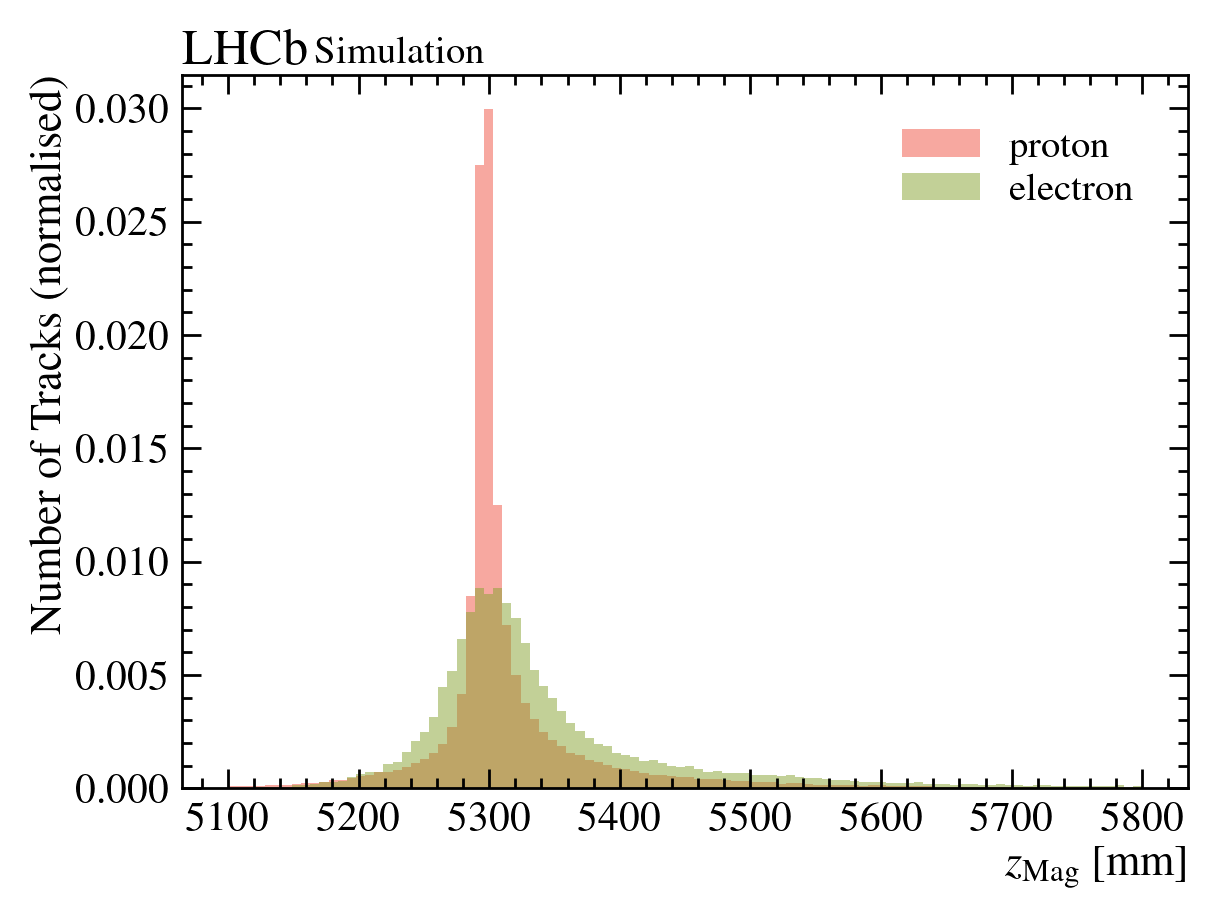

In [14]:
xmin: float = 5100
xmax: float = 5800
nbins = 100

fig = plt.figure()
# plt.hist(
#     array["match_zMag"],
#     bins=nbins,
#     range=[xmin, xmax],
#     color="#712F79",
#     alpha=0.5,
#     label="e pred",
#     density=True,
# )
# plt.hist(
#     not_e["match_zMag_def"],
#     bins=nbins,
#     range=[xmin, xmax],
#     color="#107E7D",
#     alpha=0.5,
#     label="K pred",
#     density=True,
# )
# 87A330
plt.hist(
    not_e["z_mag_xEndT"],
    bins=nbins,
    range=[xmin, xmax],
    color="#F05342",
    alpha=0.5,
    label="proton",
    density=True,
)
plt.hist(
    array["z_mag_xEndT"],
    bins=nbins,
    range=[xmin, xmax],
    color="#87A330",
    alpha=0.5,
    label="electron",
    density=True,
)
plt.xlabel(r"$z_{\mathrm{Mag}}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/match_true_zmag_e_kaon.pdf", format="PDF"
# )

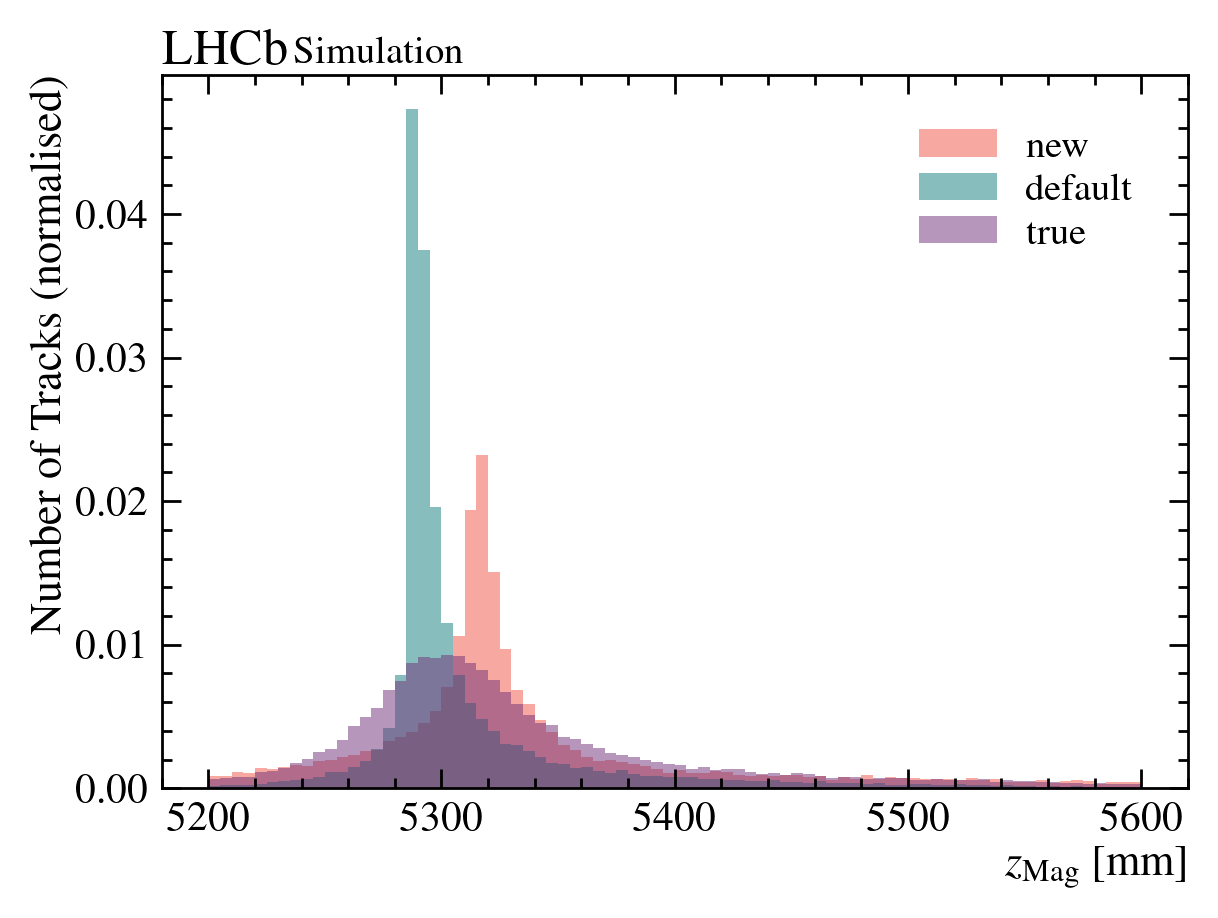

In [4]:
xmin: float = 5200
xmax: float = 5600

fig = plt.figure()
plt.hist(
    array["match_zMag"],
    bins=80,
    range=[xmin, xmax],
    color="#F05342",
    alpha=0.5,
    label="new",
    density=True,
)
plt.hist(
    array["match_zMag_def"],
    bins=80,
    range=[xmin, xmax],
    color="#107E7D",
    alpha=0.5,
    label="default",
    density=True,
)
plt.hist(
    array["z_mag_xEndT"],
    bins=80,
    range=[xmin, xmax],
    color="#712F79",
    alpha=0.5,
    label="true",
    density=True,
)
plt.xlabel(r"$z_{\mathrm{Mag}}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/match_zmag_lost_found.pdf", format="PDF"
# )

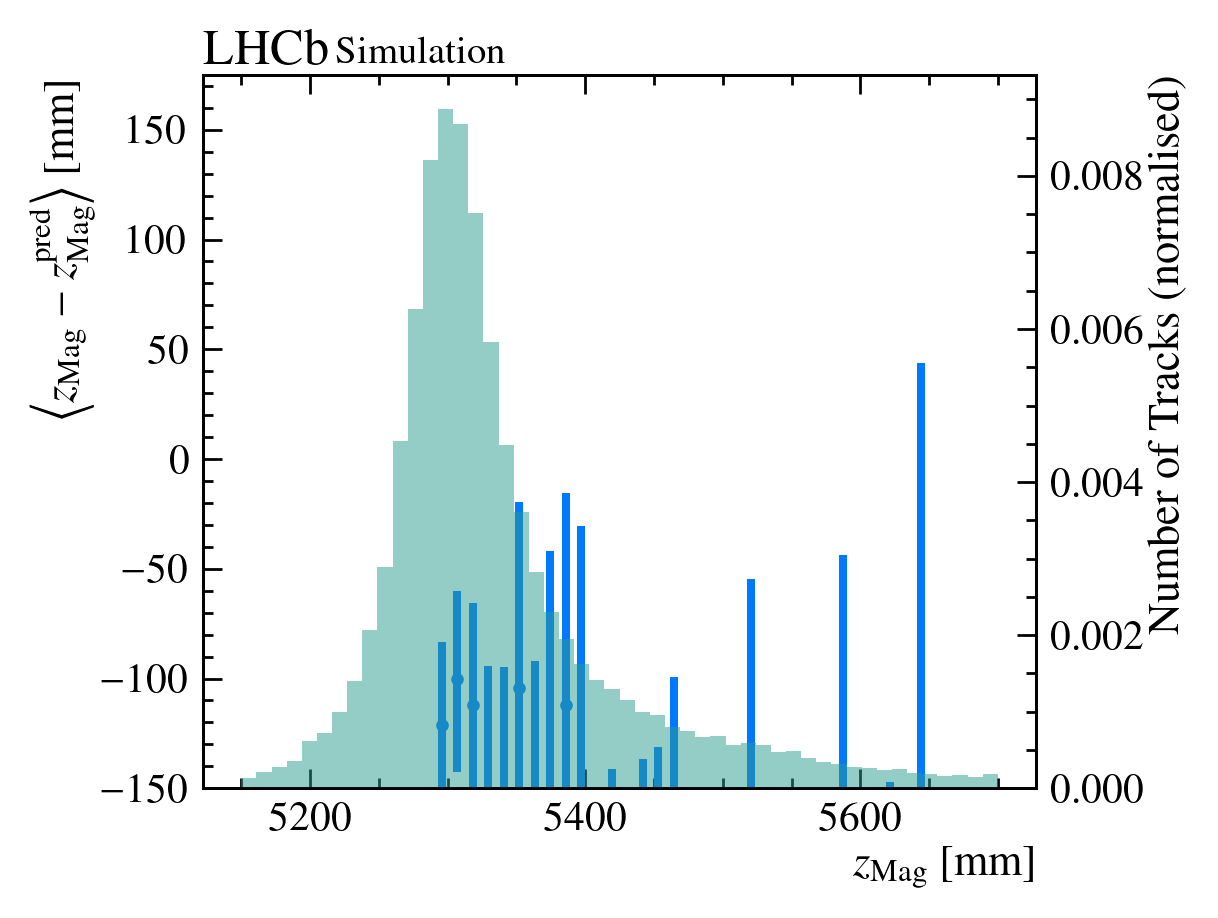

In [16]:
bins = np.linspace(5150, 5700, 50)
ax = sns.regplot(
    x=ak.to_numpy(array["z_mag_xEndT"]),
    y=ak.to_numpy(array["z_mag_xEndT"]) - ak.to_numpy(array["match_zMag"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax.set_ylim(-150, 175)
ax2 = ax.twinx()
ax2.hist(
    ak.to_numpy(array["z_mag_xEndT"]),
    bins=50,
    range=[5150, 5700],
    color="#2A9D8F",
    alpha=0.5,
    align="mid",
    density=True,
)
ax.set_xlabel(r"$z_{\mathrm{Mag}}$ [mm]")
ax.set_ylabel(
    r"$\left\langle z_{\mathrm{Mag}}-z_{\mathrm{Mag}}^{\mathrm{pred}}\right\rangle$ [mm]"
)
ax2.set_ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_regression_plot.pdf",
#     format="PDF",
# )

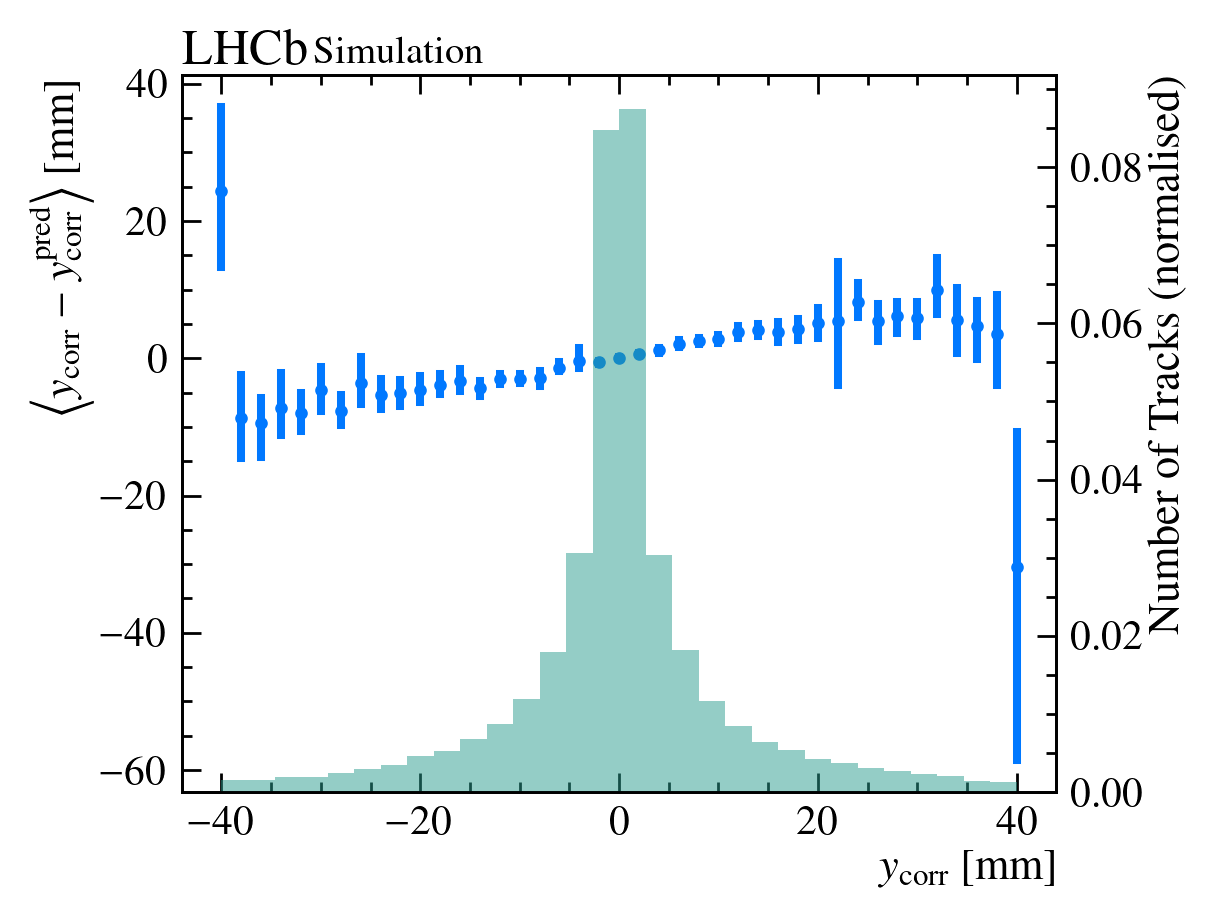

In [15]:
bins = np.linspace(-40, 40, 41)
ax = sns.regplot(
    x=ak.to_numpy(array["yDiffOut"]),
    y=ak.to_numpy(array["yDiffOut"]) - ak.to_numpy(array["match_yCorr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax2 = ax.twinx()
ax2.hist(
    ak.to_numpy(array["yDiffOut"]),
    bins=30,
    range=[-40, 40],
    color="#2A9D8F",
    alpha=0.5,
    align="mid",
    density=True,
)
ax.set_xlabel(r"$y_{\mathrm{corr}}$ [mm]")
ax.set_ylabel(
    r"$\left\langle y_{\mathrm{corr}}-y_{\mathrm{corr}}^{\mathrm{pred}}\right\rangle$ [mm]"
)
ax2.set_ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/bend_y_regression_plot.pdf",
#     format="PDF",
# )

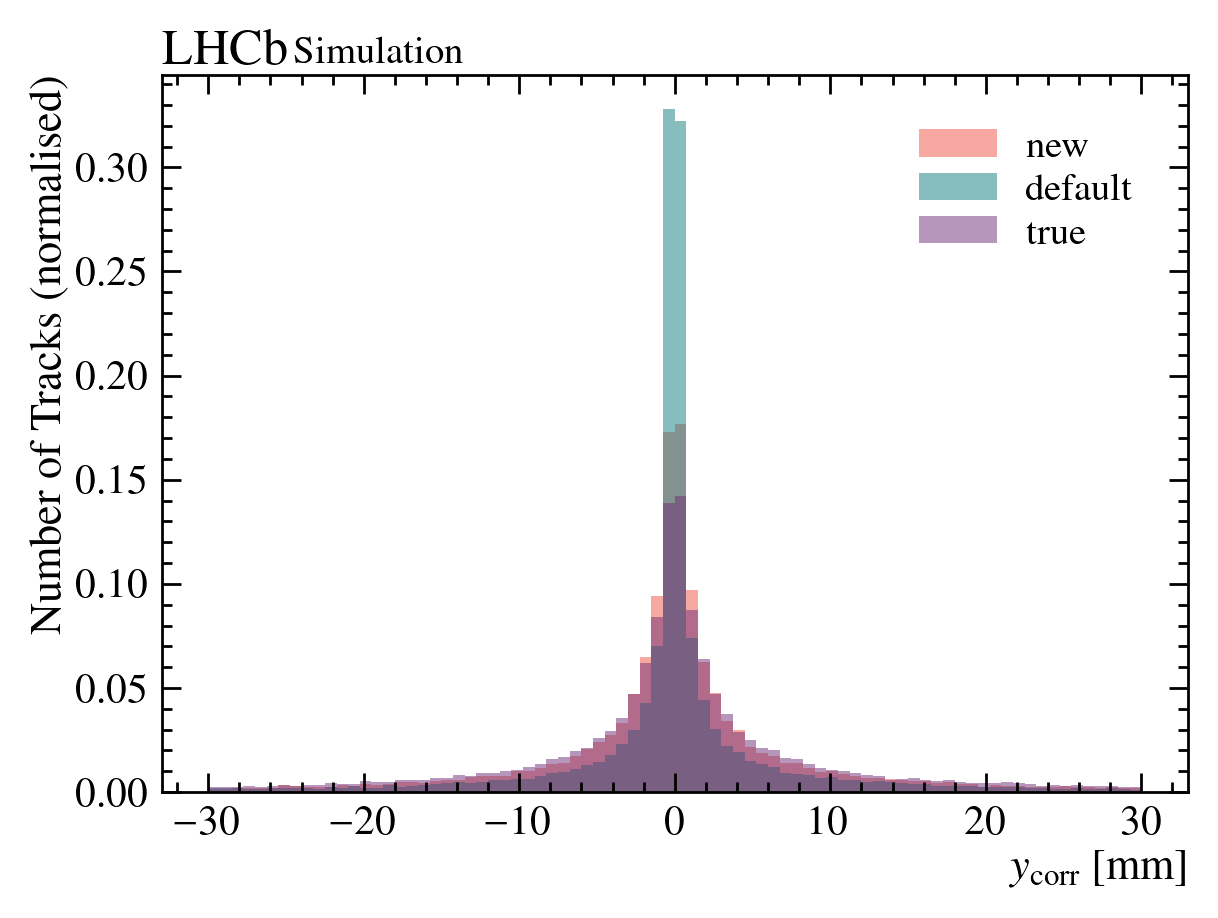

In [10]:
xmin: float = -30
xmax: float = 30

fig = plt.figure()
plt.hist(
    array["match_yCorr"],
    bins=80,
    range=[xmin, xmax],
    color="#F05342",
    alpha=0.5,
    label="new",
    density=True,
)
plt.hist(
    array["match_yCorr_def"],
    bins=80,
    range=[xmin, xmax],
    color="#107E7D",
    alpha=0.5,
    label="default",
    density=True,
)
plt.hist(
    array["yDiffOut"],
    bins=80,
    range=[xmin, xmax],
    color="#712F79",
    alpha=0.5,
    label="true",
    density=True,
)
plt.xlabel(r"$y_{\mathrm{corr}}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/match_zmag_lost_found.pdf", format="PDF"
# )